In [ ]:
import pandas as pd
import numpy as np 
import re  
import nltk  
from sklearn.datasets import load_files  
nltk.download('stopwords')  
import pickle  
from nltk.corpus import stopwords  
S = pd.read_csv("C:/Users/user/Desktop/S/Zycus.csv", sep='|' , delimiter=',' ,encoding='latin-1')
S.head()

In [3]:
df = pd.DataFrame(S)

In [4]:
df['Column']= df['MATERIAL_GROUP_DESC']+ " " +df['MG_LEVEL_2']+ " "+df['SHORT_TEXT']  

In [6]:
from io import StringIO
col = ['CATEGORY_LEVEL_2', 'Column']
df = df[col]
df = df[pd.notnull(df['Column'])]
df.columns = ['CATEGORY_LEVEL_2', 'Column']
df['category_id'] = df['CATEGORY_LEVEL_2'].factorize()[0]
category_id_df = df[['CATEGORY_LEVEL_2', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'CATEGORY_LEVEL_2']].values)
df.head()



,CATEGORY_LEVEL_2,Column,category_id
0,Heavylift Rigging,"ALL TYPE OF LIFTING,HOISTING & RIGGING EQUIPME...",0
1,Heavylift Rigging,"ALL TYPE OF LIFTING,HOISTING & RIGGING EQUIPME...",0
2,"Bolts, Nuts, Screws & Washers",ALL TYPE OF BOLT AND NUT ITEM AND RELATED BOLT...,1
3,"Bolts, Nuts, Screws & Washers",ALL TYPE OF BOLT AND NUT ITEM AND RELATED BOLT...,1
4,"Bolts, Nuts, Screws & Washers",ALL TYPE OF BOLT AND NUT ITEM AND RELATED BOLT...,1



stop = stopwords.words('english')
df['Column'] = df['Column'].apply(lambda x: " ".join(x for x in x.split() if x.lower() not in stop))
df['Column'].head()

In [7]:
df.CATEGORY_LEVEL_2.value_counts()

Stationery                                    2653
Marine Consumables                            2491
Equipment Purchase & Spares- 1                2238
Consumables- 1                                2209
Electrical and Instrumentation- 1             1683
Medical Supplies and Equipment                1463
Heavylift Rigging                             1287
Equipment Rental- 1                            914
Vessel Equipment, Spares & Maintenance- 1      883
Gaskets & Seals                                850
Personnel Protective Equipment (PPE)           840
Logistics, Warehousing and Agency- 1           835
Paints and Primer                              786
Bolts, Nuts, Screws & Washers                  780
Piping Component                               704
Mechanical Consumables                         683
Diving Equipment & Spares                      636
Gas Cylinders, Quads and Racks                 586
Fittings                                       558
Land Transportation            

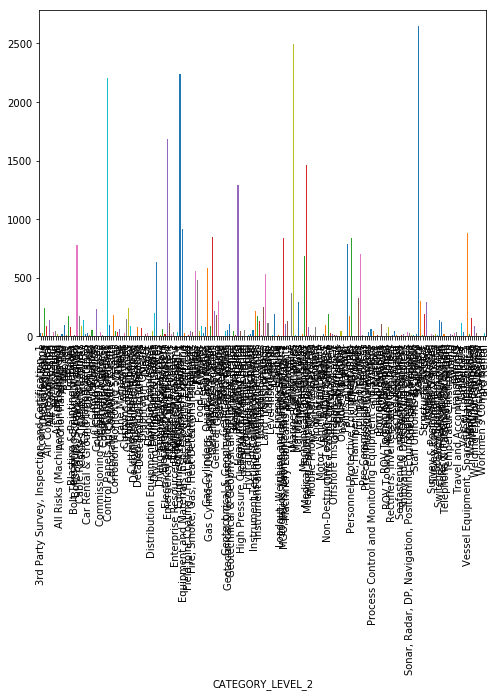

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('CATEGORY_LEVEL_2').Column.count().plot.bar(ylim=0)
plt.show()

In [10]:
import re
def clean_str(string):
    string = re.sub(r"\n","", string)
    string = re.sub(r"\r", "", string)
    #string = re.sub(r"[0-9]","digit", string)
    string = re.sub(r"\'", " ", string)
    string = re.sub(r"\"", " ", string)
    string = re.sub(r'\(.*?\)', '', string)
    string = re.sub(r"/", " ", string)
    string = re.sub(r":", " ", string)
    string = re.sub(r"-", " ", string)
    string = re.sub(r",", " ", string)
    string = re.sub(r"\+", " ", string)
    string = re.sub(r"&"," ", string)
    string = re.sub(r"#"," ", string)
    string = re.sub(r"\."," ", string)
    string = re.sub(r"\b\w+\d+\b"," ", string)
    string = re.sub(r"\b\d+\w+\b"," ", string)
    string = re.sub(r"\b\w+\d+\w+\b"," ", string)
    string = re.sub(r"[0-9]","", string)
    string = re.sub(r"\\b[A-Za-z] \\b|\\b [A-Za-z]\\b", ' ', string)
    string = re.sub(r'\b\w\b', '', string)
    string = re.sub(r'\b\w\w\b', '', string)
    string = re.sub(r'" "', '', string)
    string = re.sub(' +', ' ', string)
    return string.strip().lower()

X = []
for i in range (df.shape[0]):
    X.append(clean_str(df.iloc[i][1]))
y = df["CATEGORY_LEVEL_2"]

In [11]:
X

['all type lifting hoisting rigging equipment and related lifting hoisting rigging equipment equipment lifting hoisting rigging',
 'all type lifting hoisting rigging equipment and related lifting hoisting rigging equipment equipment lifting hoisting rigging',
 'all type bolt and nut item and related bolt nut studbolt xylan coated',
 'all type bolt and nut item and related bolt nut studbolt xylan coated',
 'all type bolt and nut item and related bolt nut nut xylan coated',
 'all type bolt and nut item and related bolt nut nut xylan coated',
 'all type bolt and nut item and related bolt nut nut xylan coated',
 'all type bolt and nut item and related bolt nut nut xylan coated',
 'all type bolt and nut item and related bolt nut nut xylan coated',
 'all type bolt and nut item and related bolt nut nut xylan coated',
 'all type bolt and nut item and related bolt nut studbolt xylan coated',
 'all type bolt and nut item and related bolt nut studbolt xylan coated',
 'all type bolt and nut item a

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Column).toarray()
labels = df.category_id
features.shape

(34465, 5339)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(df['Column'], df['CATEGORY_LEVEL_2'],test_size=0.3, random_state = 2)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#X_traindense = X_train_tfidf.todense()
#X_train_tfidf = tfidf_transformer.todense(X_train_counts)




# Prediction with Naive Bayes

In [14]:
#pca = PCA()
#X_trainpca = pca.fit_transform(X_traindense)
clf = MultinomialNB().fit(X_train_tfidf, y_train)
#clf = MultinomialNB().fit(X_trainpca, y_train)

In [ ]:
#X_testing = count_vect.transform(X_test)


In [15]:
pred = clf.predict(count_vect.transform(X_test))

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)




0.7196324951644101

In [17]:
Pred = pd.DataFrame(pred, columns = ['predictions'])
Result = pd.concat([df, Pred], axis=1)
prediction = pd.DataFrame(Result).to_csv('prediction2.csv')

# Prediction with SVM

In [19]:
from sklearn.svm import LinearSVC
SVA = LinearSVC().fit(X_train_tfidf, y_train)

In [20]:
pred1 = SVA.predict(count_vect.transform(X_test))



In [21]:
accuracy_score(y_test, pred1)

0.8664410058027079

# Prediction with Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

cl = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=100, max_depth=100)

cl.fit(X_train_tfidf, y_train) 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
pred2 = clf.predict(count_vect.transform(X_test))

In [25]:
accuracy_score(y_test, pred2)

0.7196324951644101